# joda_01_kehitysympäristö
Kehitysympäristönä Microsoft Azure Notebooks
Linkki: https://jodaairbnboslo-laurikahari.notebooks.azure.com/j/notebooks/airbnb-data-collector.ipynb

Notebooks.azure.com toimii sekä kehitysympäristönä että julkaisualustana.
Kurssin harjoitukseia tein myös CSC notebooks ympäristössä jonka etuna ovat mm. tuorein Python ympäristö mahdollistaa uusimpien kirjatojen käytön, tietokonee nopeus on parempi.


## Käytettyjä kirjastoja

matplotlib - 2D visualisointi, https://matplotlib.org/

pandas - dataframe, https://pandas.pydata.org/, Huom! kannatta olla tarkkana että käyttää sopivaa python pandas komboa. eri versiot käyttäytyvät erilailla.

numpy - tieteellinen laskenta, https://numpy.org/

sklearn - koneoppiminen, https://scikit-learn.org/stable/

Collections - datan käsittelyyn https://docs.python.org/3/library/collections.html

plotly - Visualisointi https://plot.ly/python/

folium - karttavisualisointi, https://python-visualization.github.io/folium/


In [3]:
#käytettävät kirjastot
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from collections import Counter
#import folium
#from folium.plugins import HeatMap

Valitun ympäristön kannalta on merkitystä pandaksen versiolla, tämä notebook ei toimi jos pandaksen versio on alle 0.2. 

In [4]:
pd.__version__

'0.25.1'

# joda_02_datan kerääminen

Käytän valmista airbnb datasettiä inside airbnb -palvelusta. Oslosta on saatavilla on kolme data pakettia csv-muodossa (pakattuna & ilman pakkausta) sekä visualisointia varten paikkatietoja.
Tiedostot:  

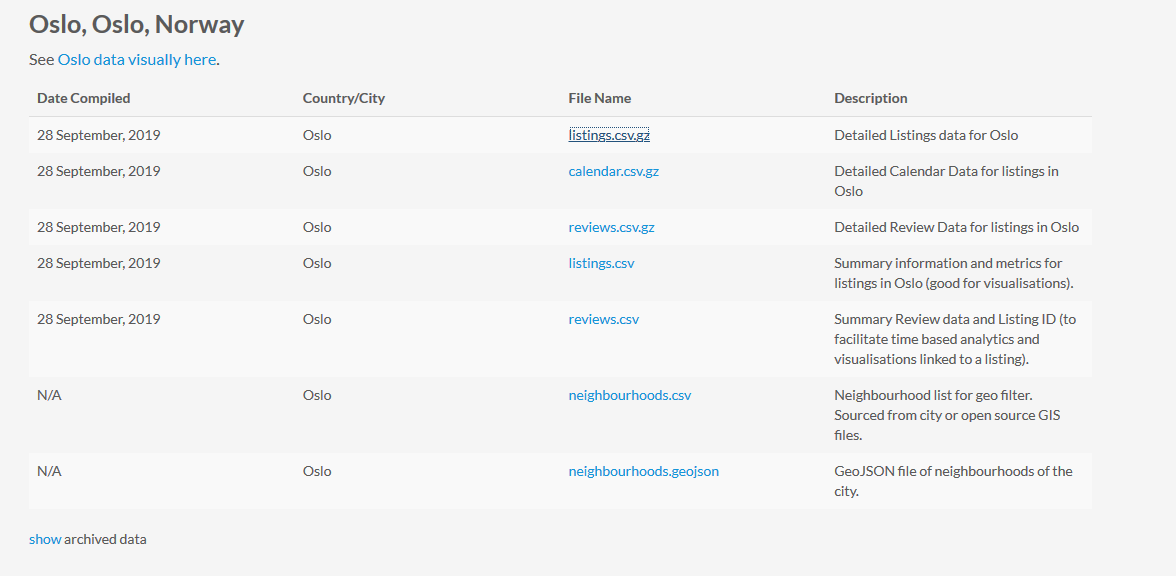

Tutkin kaikkia kolmea pakettia, joista:
Listings - Kattavin ja tärkein
Calendar - Tietoa varauksista
Reviews - Arvostelut

Osoite on muotoa http://data.insideairbnb.com/norway/oslo/oslo/2019-09-28/data/reviews.csv.gz

## Haetaan Reviews data
ja tutustutaan datan sisältöön, tutustuttin sisältö ja hypäättiin yli tarpeettomana

In [18]:
# Jos tiedosto on jo haettu kommentoidaan netistä haku pois operaation nopeuttamiseksi
# luetaan  
reviews_file = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-09-28/data/reviews.csv.gz'
# luetaan reviews tiedosto dataframe
df_rev = pd.read_csv(reviews_file, compression='gzip', low_memory=False)
# df_rev = pd.read_csv('df_rev.csv')

# tallennetaan data frame tiedostoon csv -muodossa
 df_rev.to_csv('df_rev.csv')
# sijoitetaan data franme pandas -kirjaston sarakkeiksi
pd.Series(df_rev.columns)
# Näytetään 20 ensimmäista riviä
df_rev.head(20)

IndentationError: unexpected indent (<ipython-input-18-5657581f5826>, line 9)

Tutstutaan data frameen, listning_id:llä voidaan arvostelu kytkeä listings dataan, reviewer_id:llä arvostelun tehneeseen henkilöön ja datella arvostelun tuoreuteen.

In [4]:
df_rev.shape

(150060, 7)

In [5]:
df_rev.reviewer_id.nunique()

135069

In [6]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150060 entries, 0 to 150059
Data columns (total 7 columns):
Unnamed: 0       150060 non-null int64
listing_id       150060 non-null int64
id               150060 non-null int64
date             150060 non-null object
reviewer_id      150060 non-null int64
reviewer_name    150060 non-null object
comments         149978 non-null object
dtypes: int64(4), object(3)
memory usage: 8.0+ MB


In [7]:
df_rev.isnull().sum()

Unnamed: 0        0
listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         82
dtype: int64

In [8]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150060 entries, 0 to 150059
Data columns (total 7 columns):
Unnamed: 0       150060 non-null int64
listing_id       150060 non-null int64
id               150060 non-null int64
date             150060 non-null object
reviewer_id      150060 non-null int64
reviewer_name    150060 non-null object
comments         149978 non-null object
dtypes: int64(4), object(3)
memory usage: 8.0+ MB


Data frame ja csv tiedoston nimeäminen:
df_rev - arvostelut. Mahdollisesti kiinnostavia kenttiä <b>listings_id</b>, reviever_id ja date

## Haetaan Calendar data
Ohitetaan toistaiseksi

In [9]:
# Jos tiedosto on jo haettu kommentoidaan netistä haku ja tallennus pois operaation nopeuttamiseksi.
#calendar_file = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-09-28/data/calendar.csv.gz'

# Luetaan kalenteri data data frameen, tallennetaan tiedostoon ja otetaan sarakketta pdSeries -arvoiksi ja näytetään 20 ensimmäistä arvoa.
#df_cale = pd.read_csv(calendar_file, compression='gzip', low_memory=False)
df_cale = pd.read_csv('df_cale.csv')

#df_cale.to_csv('df_cale.csv')
pd.Series(df_cale.columns)
df_cale.head(20)

,Unnamed: 0,Unnamed: 0.1,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,0,0,6253332,2019-09-28,f,$800.00,$800.00,2,1125
1,1,1,6253332,2019-09-29,f,$800.00,$800.00,2,1125
2,2,2,6253332,2019-09-30,f,$800.00,$800.00,2,1125
3,3,3,6253332,2019-10-01,f,$800.00,$800.00,2,1125
4,4,4,6253332,2019-10-02,f,$800.00,$800.00,2,1125
5,5,5,6253332,2019-10-03,f,$800.00,$800.00,2,1125
6,6,6,6253332,2019-10-04,f,$800.00,$800.00,2,1125
7,7,7,6253332,2019-10-05,f,$800.00,$800.00,2,1125
8,8,8,6253332,2019-10-06,f,$800.00,$800.00,2,1125
9,9,9,6253332,2019-10-07,f,$800.00,$800.00,2,1125


In [10]:
df_cale.shape

(1184171, 9)

In [11]:
df_cale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184171 entries, 0 to 1184170
Data columns (total 9 columns):
Unnamed: 0        1184171 non-null int64
Unnamed: 0.1      1184171 non-null int64
listing_id        1184171 non-null int64
date              1184171 non-null object
available         1184171 non-null object
price             1184171 non-null object
adjusted_price    1184171 non-null object
minimum_nights    1184171 non-null int64
maximum_nights    1184171 non-null int64
dtypes: int64(5), object(4)
memory usage: 81.3+ MB


In [12]:
df_cale.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    0
maximum_nights    0
dtype: int64

Data frame ja csv tiedoston nimeäminen:
df_rev - arvostelut. Kenttiä listings_id, reviever_id ja date
df_cale - kalenteri varaukset. Kenttiä listning_id

## Haetaan listings data

In [8]:
# Jos tiedosto on jo haettu kommentoidaan netistä haku ja tallennus pois operaation nopeuttamiseksi.
list_file = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-09-28/data/listings.csv.gz'

# read listings short file into a dataframe
df_list = pd.read_csv(list_file, compression='gzip', low_memory=False)
df_list.to_csv('list.csv')
#luetaan tiedostosta
#df_list = pd.read_csv('list.csv', low_memory=False)

# tutkitaan datasettiä sarakenimien avulla
#pd.options.display.max_rows=110
pd.Series(df_list.columns)
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42932,https://www.airbnb.com/rooms/42932,20190928160337,2019-09-28,"Charming apartment, Oslo Center, Ro",NaN,"Charming apartment, Oslo Center, Royal House T...","Charming apartment, Oslo Center, Royal House T...",none,(URL HIDDEN),...,t,f,moderate,f,f,1,1,0,0,0.50
1,43198,https://www.airbnb.com/rooms/43198,20190928160337,2019-09-28,Lovely low budgetroom in nice area!,"This is a small, bright room, facing our quiet...","A beautiful intimate bedroom, in an appartment...","This is a small, bright room, facing our quiet...",none,Only five minutes walk from the castle and the...,...,t,f,strict_14_with_grace_period,f,f,2,0,2,0,0.70
2,43431,https://www.airbnb.com/rooms/43431,20190928160337,2019-09-28,Room for recreation up town Oslo,Neat and fresh looking apt. in up town Oslo si...,NaN,Neat and fresh looking apt. in up town Oslo si...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,0.44
3,69964,https://www.airbnb.com/rooms/69964,20190928160337,2019-09-28,Lovely flat in Oslo city centre,NaN,"Warm, modern flat (410 square feet) in quiet a...","Warm, modern flat (410 square feet) in quiet a...",none,NaN,...,f,f,moderate,f,f,1,1,0,0,0.07
4,71725,https://www.airbnb.com/rooms/71725,20190928160337,2019-09-28,Central big room - ap with balcony,A bargain in Oslo!! Room in new and fully furn...,This is a bargain in expensive Oslo! In my bri...,A bargain in Oslo!! Room in new and fully furn...,none,The apartment is situated in the eastern part ...,...,f,f,moderate,f,f,1,0,1,0,0.46


In [9]:
df_list.shape

(8577, 106)

In [10]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Columns: 106 entries, id to reviews_per_month
dtypes: float64(25), int64(21), object(60)
memory usage: 6.9+ MB


In [11]:
pd.Series(df_list.columns)

0                                                id
1                                       listing_url
2                                         scrape_id
3                                      last_scraped
4                                              name
                           ...                     
101                  calculated_host_listings_count
102     calculated_host_listings_count_entire_homes
103    calculated_host_listings_count_private_rooms
104     calculated_host_listings_count_shared_rooms
105                               reviews_per_month
Length: 106, dtype: object

In [12]:
df_list.isnull().sum()
#count_nan = len(df_list) - df_list.count()
#count_nan

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                              21
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1735
Length: 106, dtype: int64

Data frame ja csv tiedoston nimeäminen:

- df_rev - arvostelut. Kenttiä listings_id, reviever_id ja date

- df_cale - kalenteri varaukset. Kenttiä listning_id

- df_list - listaukset. Kenttiä yhteensä 106 price,accommodates,bedrooms,beds,neighbourhood_cleansed,room_type,cancellation_policy,instant_bookable,
reviews_per_month,number_of_reviews,availability_30,review_scores_rating,listing_url,latitude,longitude

- df_m, data.csv - valitut tiedot. Kenttiä price,accommodates,bedrooms,beds,neighbourhood_cleansed,room_type,cancellation_policy,instant_bookable,
reviews_per_month,number_of_reviews,availability_30,review_scores_rating,listing_url,latitude,longitud

## Valitaan kerättävä data

In [19]:
listings_file = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-09-28/data/listings.csv.gz'
#listings_file = 'listings_file.csv'

cols = ['price',
        'accommodates',
       'bedrooms',
        'beds',
        'neighbourhood_cleansed',
        'room_type',
        'cancellation_policy',
        'instant_bookable',
        'reviews_per_month',
        'number_of_reviews',
        'availability_30',
        'review_scores_rating',
        'listing_url',
        'latitude',
        'longitude'
        ]

# read the file into a dataframe
df_m = pd.read_csv(listings_file, compression='gzip', usecols=cols)
#df_m = pd.read_csv('listings.csv')
df_m.to_csv('data.csv')

#len(df_m.index)
df_m.shape

(8577, 15)

In [30]:
df_m.head()

,listing_url,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,https://www.airbnb.com/rooms/42932,Frogner,59.91234,10.72384,Entire home/apt,3,2.0,3.0,1925.0,28,37,97.0,t,moderate,0.50
1,https://www.airbnb.com/rooms/43198,Frogner,59.91839,10.71457,Private room,3,1.0,1.0,381.0,0,36,97.0,t,strict_14_with_grace_period,0.70
2,https://www.airbnb.com/rooms/43431,Frogner,59.91811,10.70714,Private room,1,1.0,2.0,472.0,0,47,96.0,f,strict_14_with_grace_period,0.44
3,https://www.airbnb.com/rooms/69964,Sagene,59.93898,10.77360,Entire home/apt,3,1.0,1.0,999.0,28,7,94.0,f,moderate,0.07
4,https://www.airbnb.com/rooms/71725,Gamle Oslo,59.90611,10.78000,Private room,3,1.0,2.0,499.0,0,48,95.0,f,moderate,0.46


# joda_03_datan jalostaminen

Tutkitaan datan sisältöä ja muokataan tarpeen mukaan.


In [20]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 15 columns):
listing_url               8577 non-null object
neighbourhood_cleansed    8577 non-null object
latitude                  8577 non-null float64
longitude                 8577 non-null float64
room_type                 8577 non-null object
accommodates              8577 non-null int64
bedrooms                  8572 non-null float64
beds                      8569 non-null float64
price                     8577 non-null object
availability_30           8577 non-null int64
number_of_reviews         8577 non-null int64
review_scores_rating      6673 non-null float64
instant_bookable          8577 non-null object
cancellation_policy       8577 non-null object
reviews_per_month         6842 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 1005.2+ KB


Korjataan hinta, poistetaan turhat merkit ja muutetaan numeroksi

In [57]:
pd.Series(df_m.columns).head

<bound method NDFrame.head of 0                listing_url
1     neighbourhood_cleansed
2                   latitude
3                  longitude
4                  room_type
5               accommodates
6                   bedrooms
7                       beds
8                      price
9            availability_30
10         number_of_reviews
11      review_scores_rating
12          instant_bookable
13       cancellation_policy
14         reviews_per_month
dtype: object>

Tutkitaan hinta parametria

In [28]:
df_m['price'] = df_m['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)
df_m.price.sort_values(ascending=False).head(20)

3501    90806.0
968     80000.0
4203    69721.0
5544    30002.0
6950    17371.0
4015    15001.0
13      14520.0
3620    11995.0
1250     9998.0
4276     9998.0
6935     9489.0
1671     9081.0
3878     8990.0
7702     8000.0
7058     8000.0
5228     8000.0
1257     7037.0
194      7001.0
6658     7001.0
2189     6602.0
Name: price, dtype: float64

Nimetään df_m df, koska olin käyttänyt sitä toisessa työkirjassa

In [49]:
df=df_m

In [50]:
df.price.describe()

count     7906.000000
mean       947.207184
std       1745.856620
min         82.000000
25%        545.000000
50%        754.000000
75%        999.000000
max      90806.000000
Name: price, dtype: float64

 Suodattaminen hinnan mukaan, (hakasulkujen sisällä hinta suurempi kuin 95% hinnasta).

In [59]:
df.price.quantile(0.95)

1998.0

In [60]:
df_expensive = df[df.price > df.price.quantile(0.95)]
len(df_expensive)

319

In [61]:
#df_expensive.describe()

Kalleimpien asuntojen kuvauksia voi tutkia vaikka web linkistä

In [62]:
df.sort_values(by=['price'],ascending=False).head(20)

,listing_url,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bedrooms,beds,price,availability_30,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
3501,https://www.airbnb.com/rooms/17577563,Nordstrand,59.88426,10.79236,Entire home/apt,5,3.0,3.0,90806.0,29,0,NaN,f,flexible,0.00
968,https://www.airbnb.com/rooms/6683247,St. Hanshaugen,59.93048,10.73405,Private room,2,1.0,2.0,80000.0,29,69,99.0,f,strict_14_with_grace_period,1.38
4203,https://www.airbnb.com/rooms/19444656,Sentrum,59.91705,10.74023,Entire home/apt,4,2.0,2.0,69721.0,0,2,100.0,f,flexible,0.74
5544,https://www.airbnb.com/rooms/24616982,Frogner,59.90950,10.72689,Entire home/apt,8,4.0,6.0,30002.0,30,0,NaN,f,flexible,0.00
6950,https://www.airbnb.com/rooms/31930927,Sagene,59.93477,10.76662,Entire home/apt,4,2.0,4.0,17371.0,30,0,NaN,t,moderate,0.00
4015,https://www.airbnb.com/rooms/19119253,Gamle Oslo,59.90203,10.75199,Entire home/apt,6,3.0,3.0,15001.0,27,3,100.0,t,strict_14_with_grace_period,0.12
13,https://www.airbnb.com/rooms/174372,Sagene,59.92978,10.75952,Entire home/apt,6,2.0,2.0,14520.0,29,36,97.0,t,moderate,0.36
3620,https://www.airbnb.com/rooms/17998160,Vestre Aker,59.94879,10.68689,Entire home/apt,16,8.0,16.0,11995.0,29,3,100.0,f,strict_14_with_grace_period,0.10
4276,https://www.airbnb.com/rooms/19551105,St. Hanshaugen,59.92689,10.73235,Entire home/apt,2,1.0,1.0,9998.0,30,3,100.0,t,flexible,0.11
1250,https://www.airbnb.com/rooms/7801622,Ullern,59.92398,10.68017,Entire home/apt,4,1.0,2.0,9998.0,0,8,95.0,f,strict_14_with_grace_period,0.16


Kallein asunto on itseasiassa omakotitalo https://www.airbnb.com/rooms/17577563 , joten ihan tilastollisesti hylkään kalleimmat jos hinta on yli 14000 dollaria	

In [64]:
df=df[df.price <= 14000]

In [65]:
df.price.sort_values(ascending=False).head()

3620    11995.0
4276     9998.0
1250     9998.0
6935     9489.0
1671     9081.0
Name: price, dtype: float64

Seuraavaksi pitäisi poistaa rivit joissa bedrooms ja bed on nolla..TODO.

In [74]:
df.isnull().sum()

listing_url                  0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
room_type                    0
accommodates                 0
bedrooms                     5
beds                         7
price                        0
availability_30              0
number_of_reviews            0
review_scores_rating      1790
instant_bookable             0
cancellation_policy          0
reviews_per_month            0
dtype: int64

Tarkastellaan Asuntojen lukumäärää kaupunginosittain

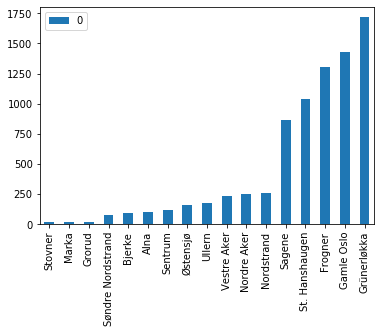

In [66]:
nb_counts = Counter(df.neighbourhood_cleansed)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
tdf.plot(kind='bar')